## Tablas de frecuencia para variables cualitativas

In [1]:
import pandas as pd
# Turn off notebook package warnings
import warnings
warnings.filterwarnings('ignore')

# print graphs in the document
%matplotlib inline


iris = pd.read_csv("https://raw.githubusercontent.com/toneloy/data/master/iris.csv")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
iris.agg(['sum', 'min'])

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_group
sum,876.5,458.6,563.7,179.9,setosasetosasetosasetosasetosasetosasetosaseto...,NaN
min,4.3,2.0,1.0,0.1,setosa,"(4.0, 5.0]"


In [24]:
(iris 
  .groupby("species")
  .agg(frecuencia=("species", "count")))

,frequencua
species,
setosa,50
versicolor,50
virginica,50


Nota: pip install plotnine  

## Graficar tabla frecuencias de variable cualitativa
Diagrama de barras

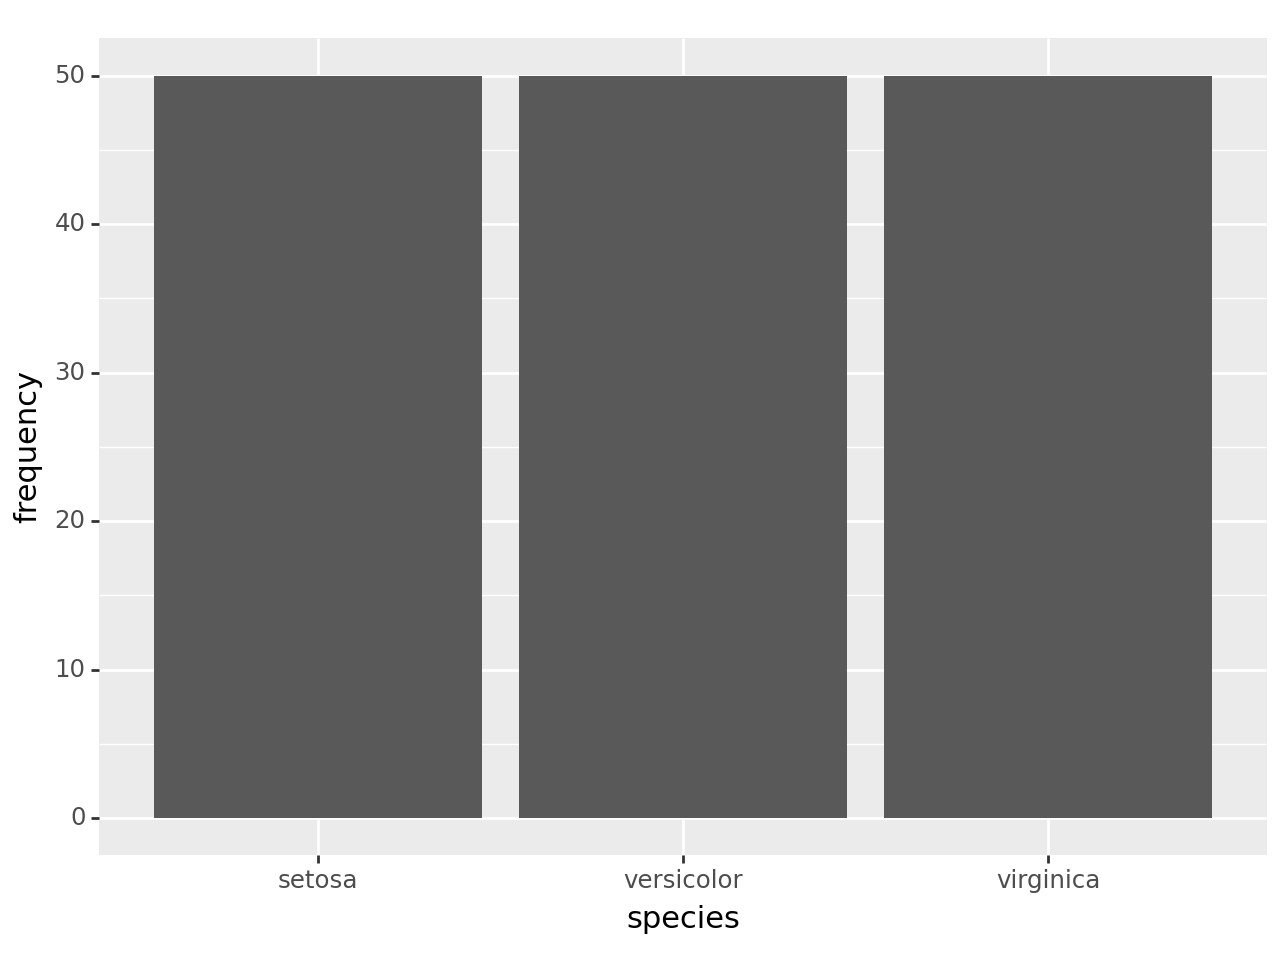

<Figure Size: (640 x 480)>

In [31]:
#old fashion
from plotnine import *

freq_by_species = (iris 
  .groupby("species")
  .agg(frequency=("species", "count"))
  .reset_index())
  
(ggplot(freq_by_species, aes(x = "species", y = "frequency")) +
  geom_bar(stat = 'identity'))

<Axes: xlabel='species', ylabel='count'>

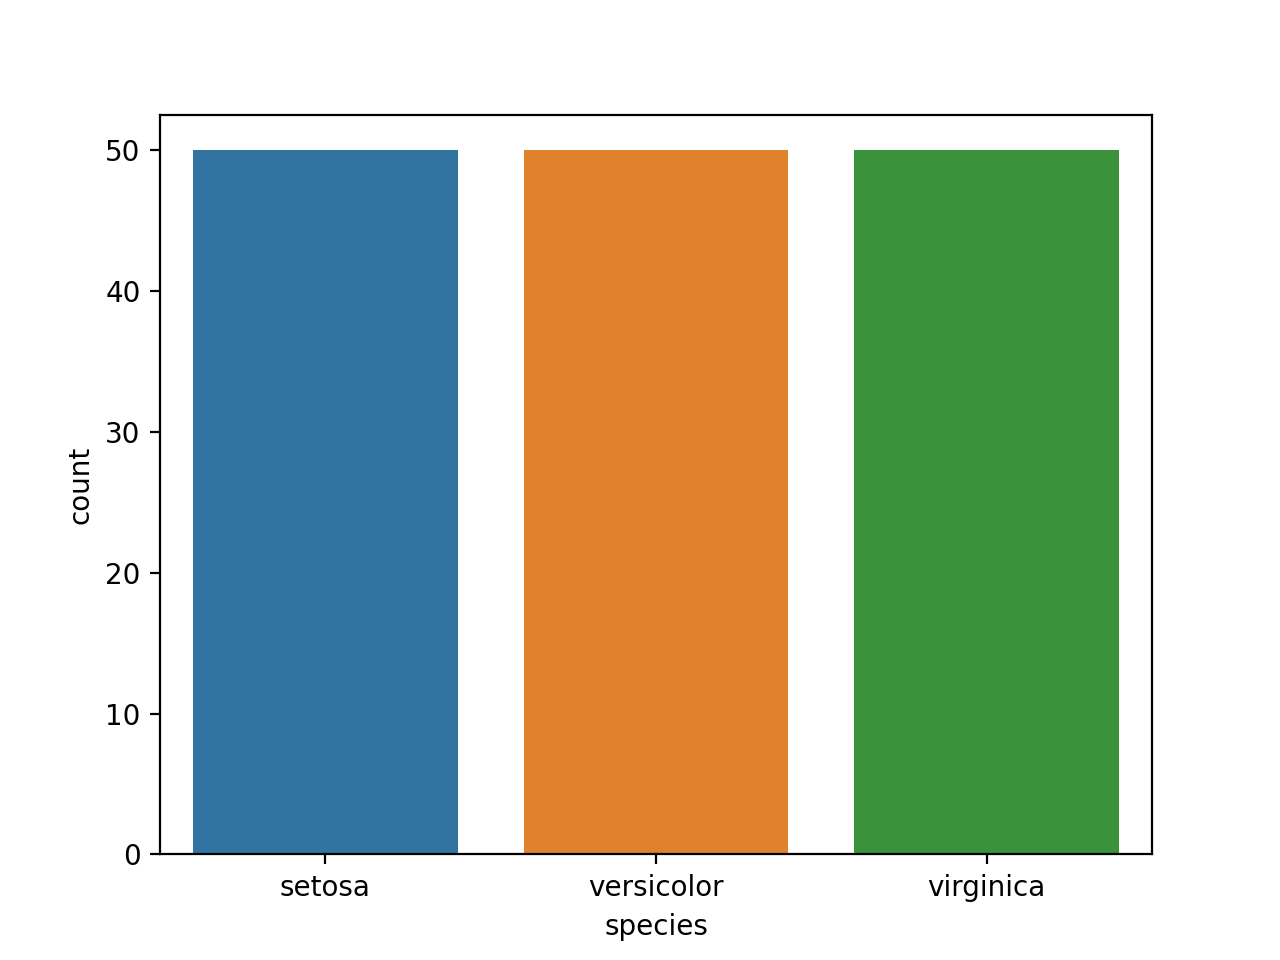

In [45]:
#diagrama de frecuencias
import seaborn as sns
sns.countplot(x='species', data=iris)

Pregunta: Si sumas todas las frecuencias ¿Qué resultado deberías tener?

    El tamaño de la muestra, n
    La suma de todos los valores de x
    No se puede saber

## Tablas de frecuencia para variables cuantitativas

In [4]:
(iris
  .groupby("sepal_length")
  .agg(frequency=("sepal_length", "count"))
  .head())

,frequency
sepal_length,
4.3,1
4.4,3
4.5,1
4.6,4
4.7,2


Para agrupar valores de una variable cuantitativa en intervalos utilizamos la función pd.cut

In [33]:
iris["sepal_length_group"] = pd.cut(iris["sepal_length"], bins=5)

(iris
  .groupby("sepal_length_group")
  .agg(frequency=("sepal_length_group", "count")))

,frequency
sepal_length_group,
"(4.296, 5.02]",32
"(5.02, 5.74]",41
"(5.74, 6.46]",42
"(6.46, 7.18]",24
"(7.18, 7.9]",11


Aunque el resultado anterior no tiene nada incorrecto, podríamos hacer que los intervalos sean más legibles. vamos a hacer intervalos de longitud 1, desde el 4 hasta el 8

In [6]:
list(range(4, 8+1, 1))

[4, 5, 6, 7, 8]

In [35]:
bins = list(range(4, 8+1, 1))

iris["sepal_length_group"] = pd.cut(iris["sepal_length"], bins=bins)

(iris
  .groupby("sepal_length_group")
  .agg(frequencia=("sepal_length_group", "count")))

,frequency
sepal_length_group,
"(4, 5]",32
"(5, 6]",57
"(6, 7]",49
"(7, 8]",12


Los intervalos son abiertos a la izquierda y cerrados a la derecha. Esto implica que el 5 está incluído en el primer intervalo y no en el segundo 

## Frecuencias acumuladas

Podemos agregar una columna más a la tabla de frecuencias, acumulando las frecuencias para cada clase, utilizando la función cumsum.

In [47]:
bins = list(range(4, 8+1, 1))

bins

iris["sepal_length_group"] = pd.cut(iris["sepal_length"], bins=bins)

sepal_length_counts = (iris
                       .groupby("sepal_length_group")
                       .agg(frecuencia=("sepal_length_group", "count")))

sepal_length_counts["cum_frecuencia"] = sepal_length_counts["frecuencia"].cumsum()

sepal_length_counts


[4, 5, 6, 7]

## Graficar una tabla de frecuencias de una variable cuantitativa

Podríamos seguir los mismo pasos que para una variable cualitativa y utilizar geom_bar

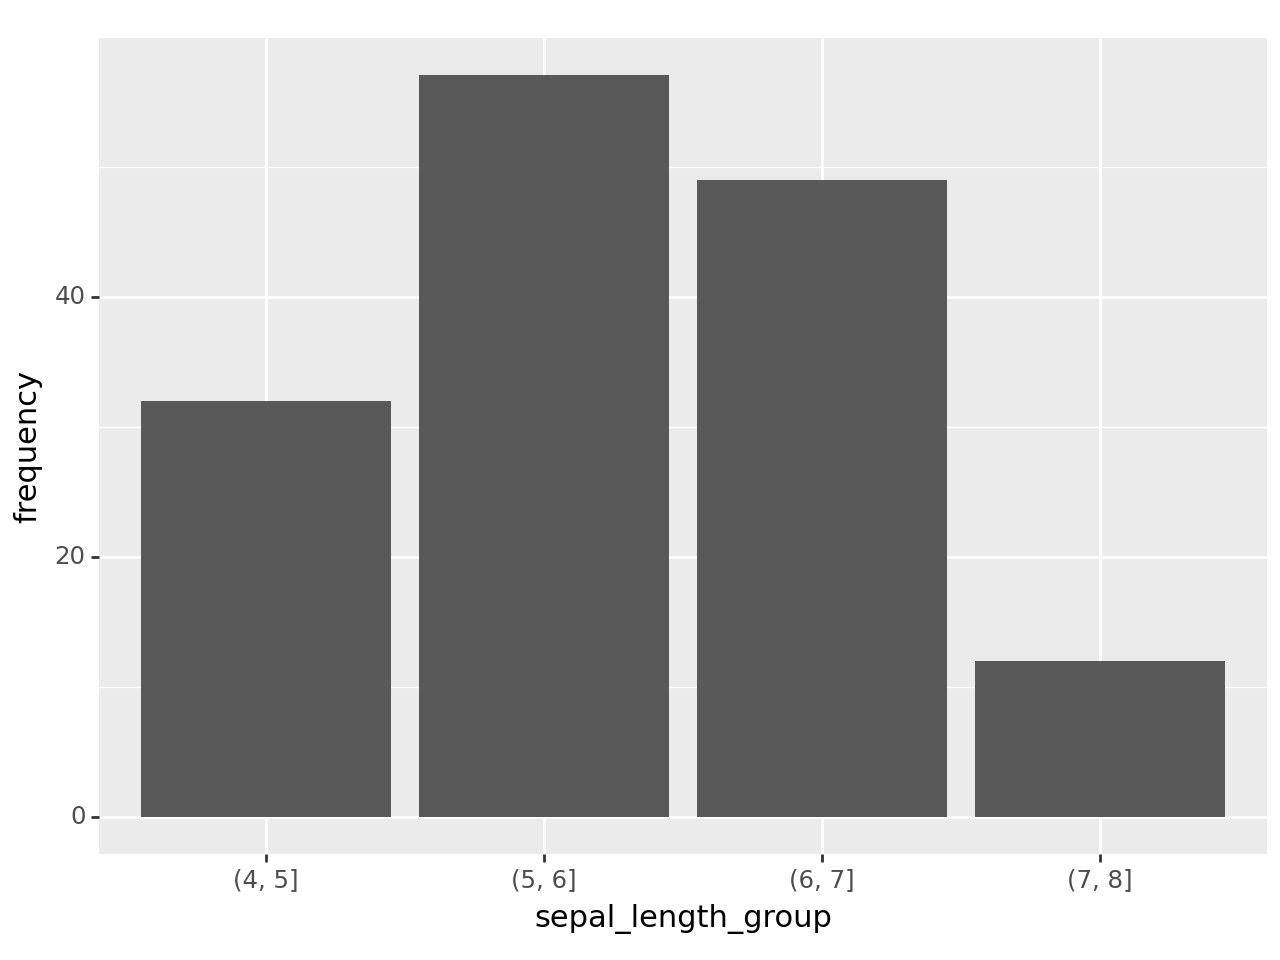

<Figure Size: (640 x 480)>

In [9]:
bins = list(range(4, 8+1, 1))

iris["sepal_length_group"] = pd.cut(iris["sepal_length"], bins=bins)

sepal_length_counts = (iris
                       .groupby("sepal_length_group")
                       .agg(frequency=("sepal_length", "count"))
                       .reset_index())

(ggplot(sepal_length_counts) +  
 geom_bar(aes(x = "sepal_length_group", y = "frequency"), stat = 'identity'))


Sin embargo, un histograma es más apropiado. Un histograma es un tipo particular de gráfico de barras

<Axes: xlabel='sepal_length', ylabel='Count'>

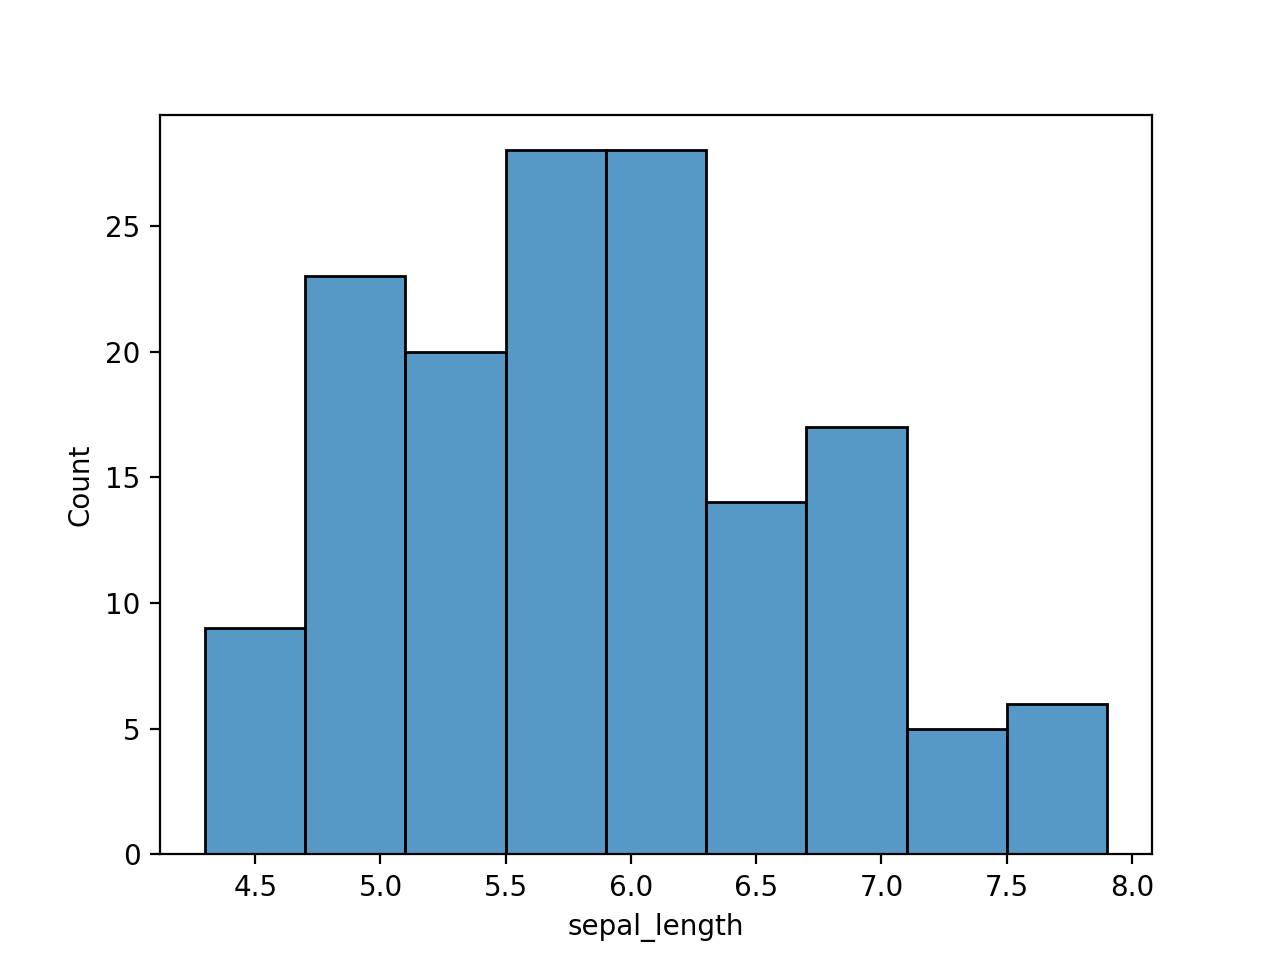

In [10]:
# o bien
import seaborn as sns
sns.histplot(data=iris, x="sepal_length")

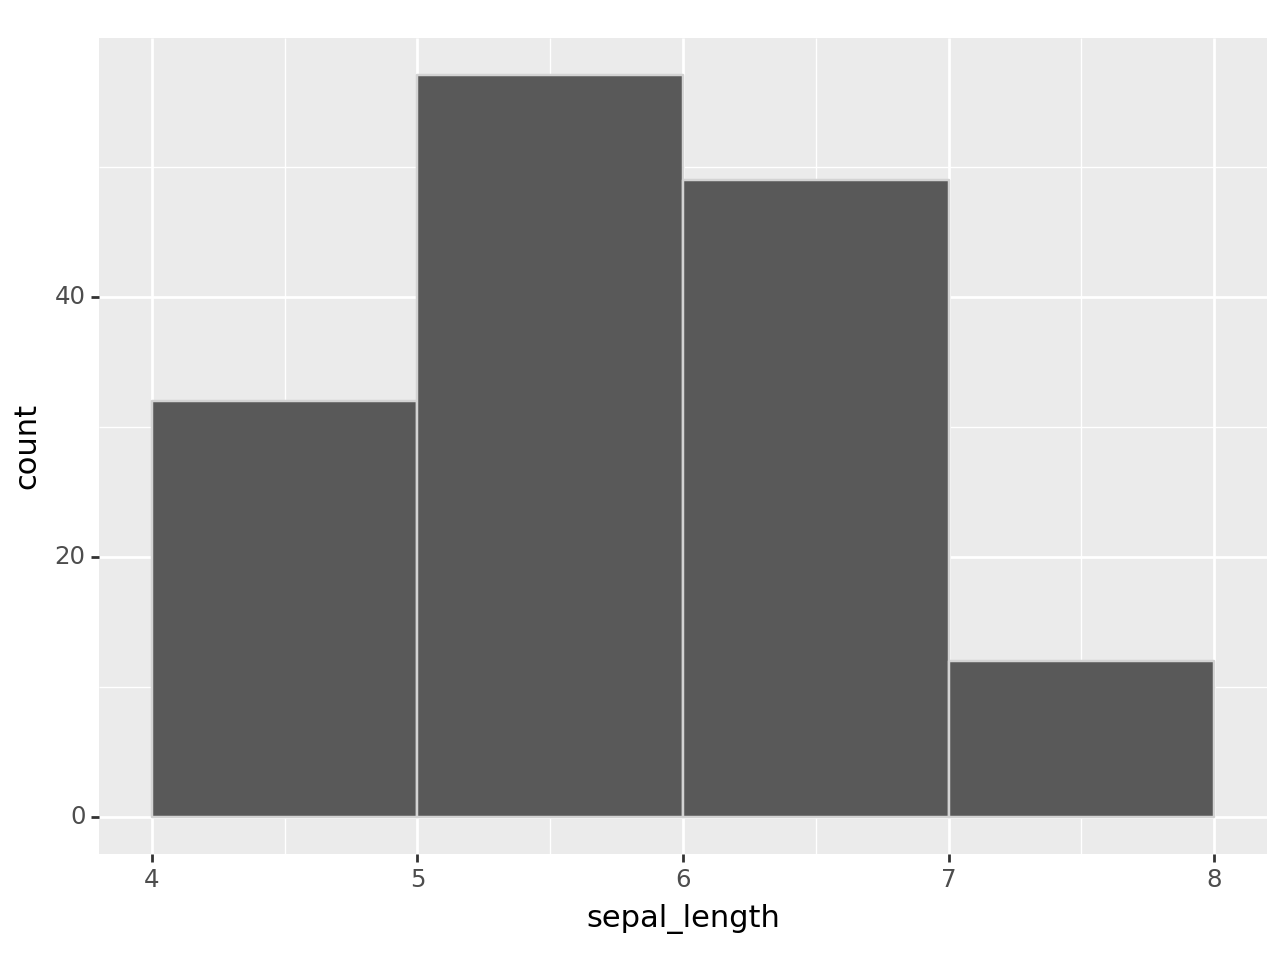

<Figure Size: (640 x 480)>

In [44]:
(ggplot(iris) +
  geom_histogram(aes(x = "sepal_length"), binwidth=1, boundary=4, colour='lightgrey'))

## Otros gráficos: sectores

[0.24600000000000002, 1.3259999999999998, 2.026]
['versicolor', 'virginica', 'setosa']


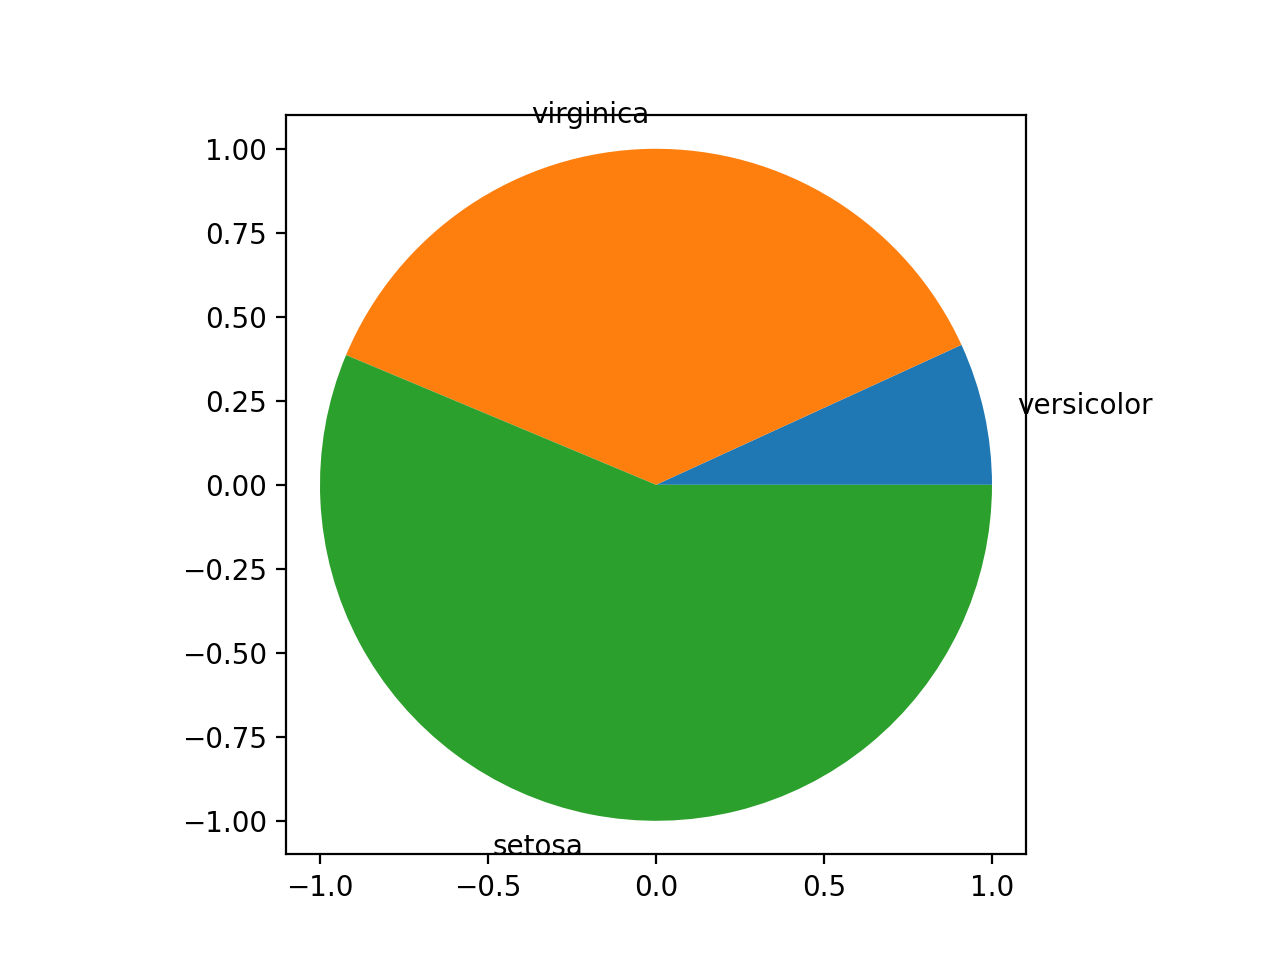

In [12]:
import matplotlib.pyplot as plt

valor = iris["petal_width"]
#valor_unicos = list(set(iris.mean()))
valor_unicos = list(iris.groupby(['species'])['petal_width'].mean())

grupos = iris["species"]
grupos_unicos = list(set(grupos))
print(valor_unicos)
print(grupos_unicos)

# Pie chart
fig, ax = plt.subplots()
ax.pie(valor_unicos, labels = grupos_unicos, frame = True)
plt.show()
 


<Axes: xlabel='sepal_length'>

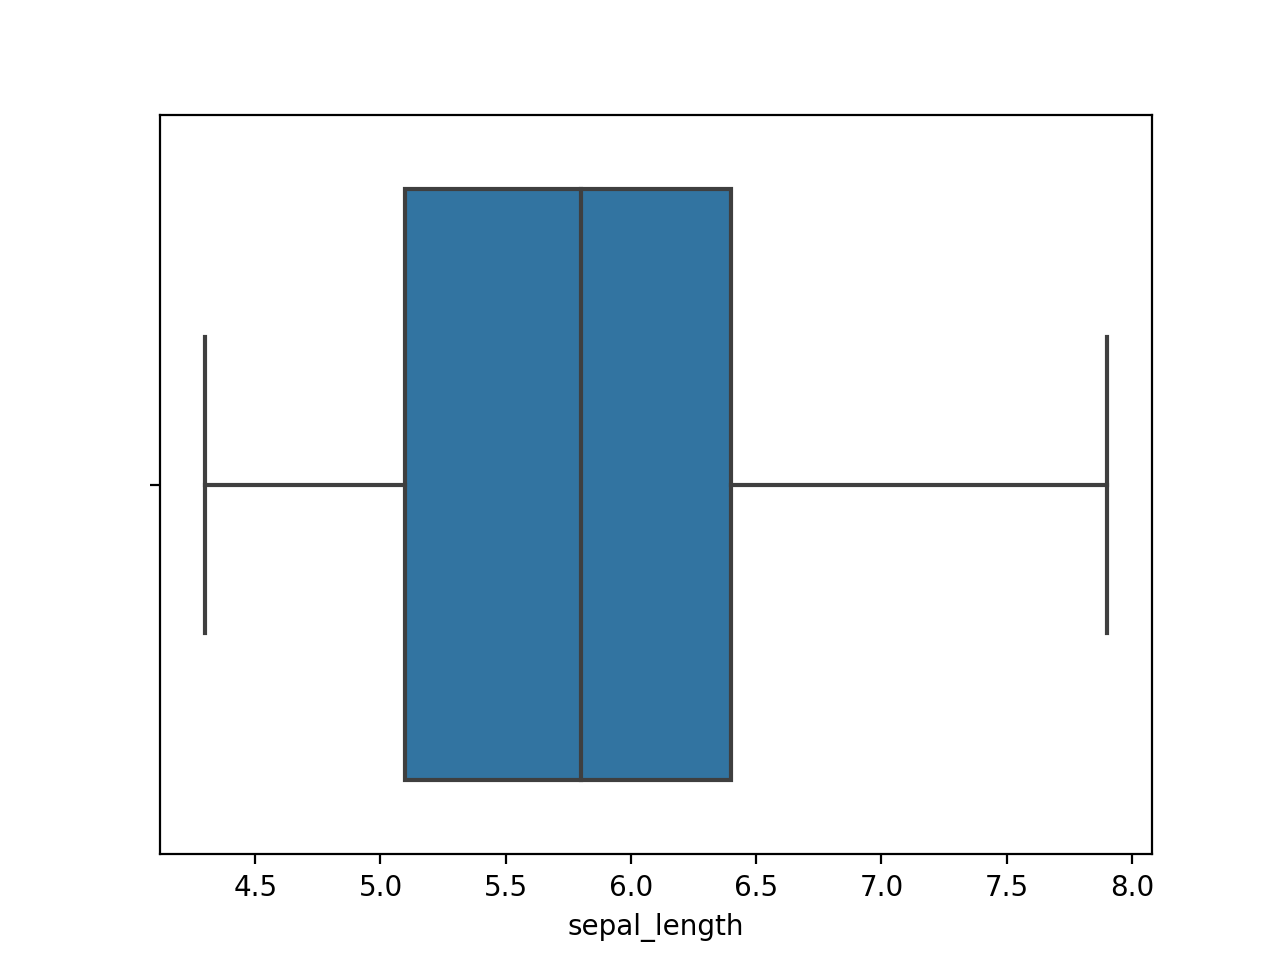

In [13]:
#diagrama de cajas
sns.boxplot(x="sepal_length", data=iris)

<Axes: xlabel='sepal_width', ylabel='Density'>

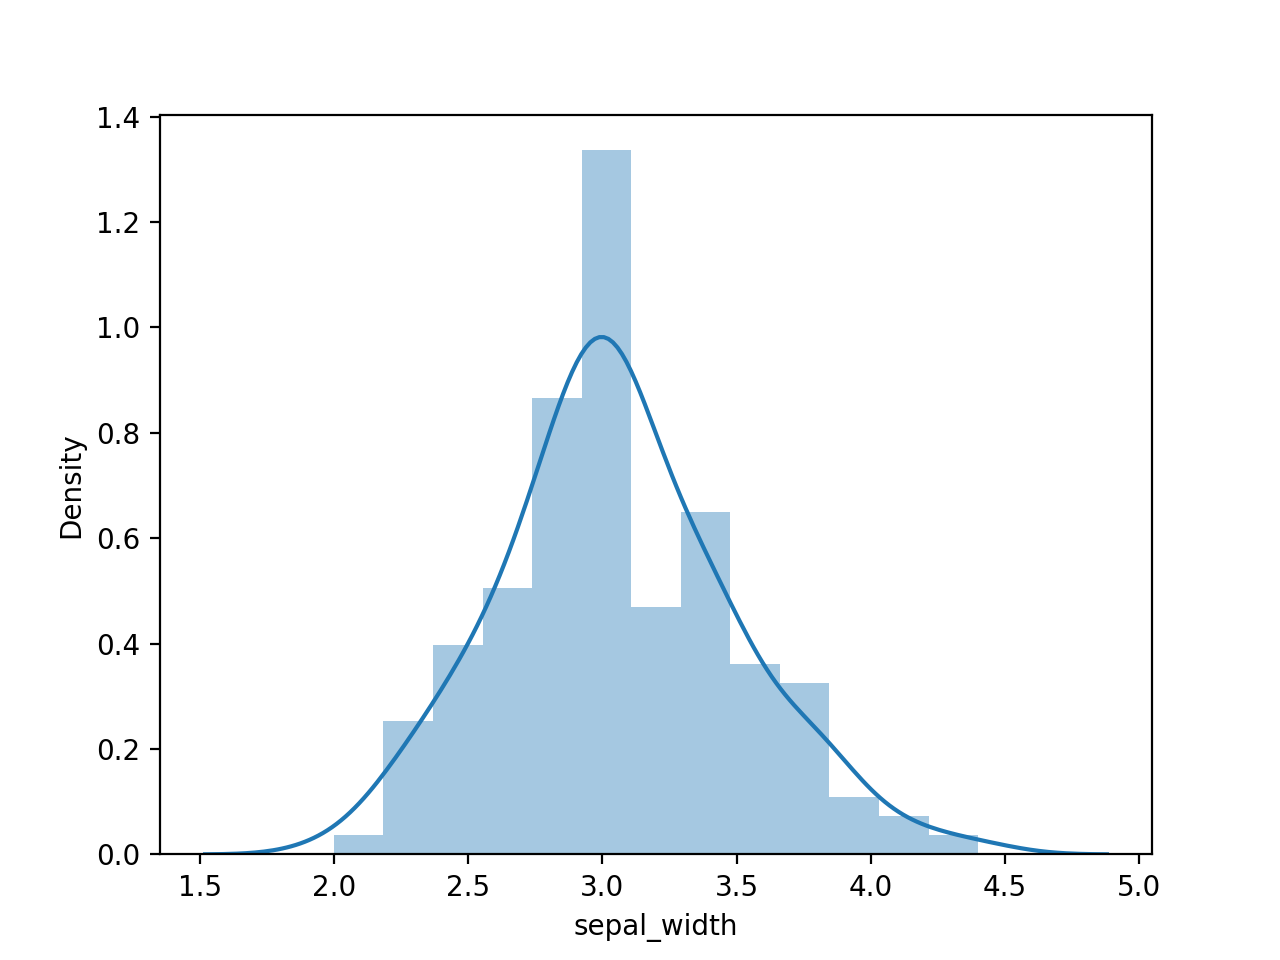

In [14]:
#diagrama de distribución
sns.distplot(iris['sepal_width'])

<Axes: xlabel='sepal_width', ylabel='Density'>

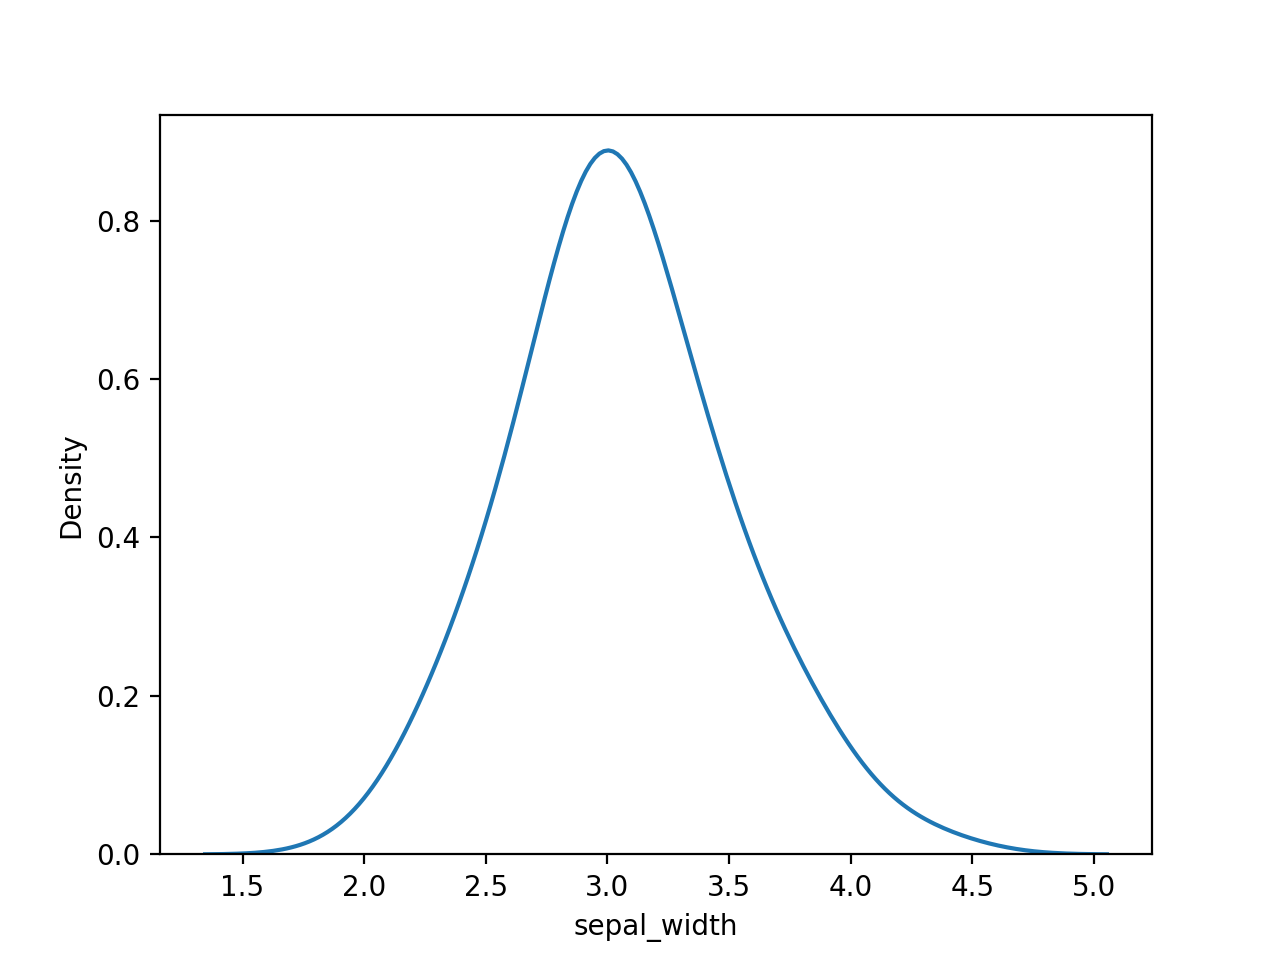

In [15]:
#diagrama de distribución (linea)
sns.kdeplot(iris['sepal_width'], bw=0.5)

<Axes: xlabel='species', ylabel='count'>

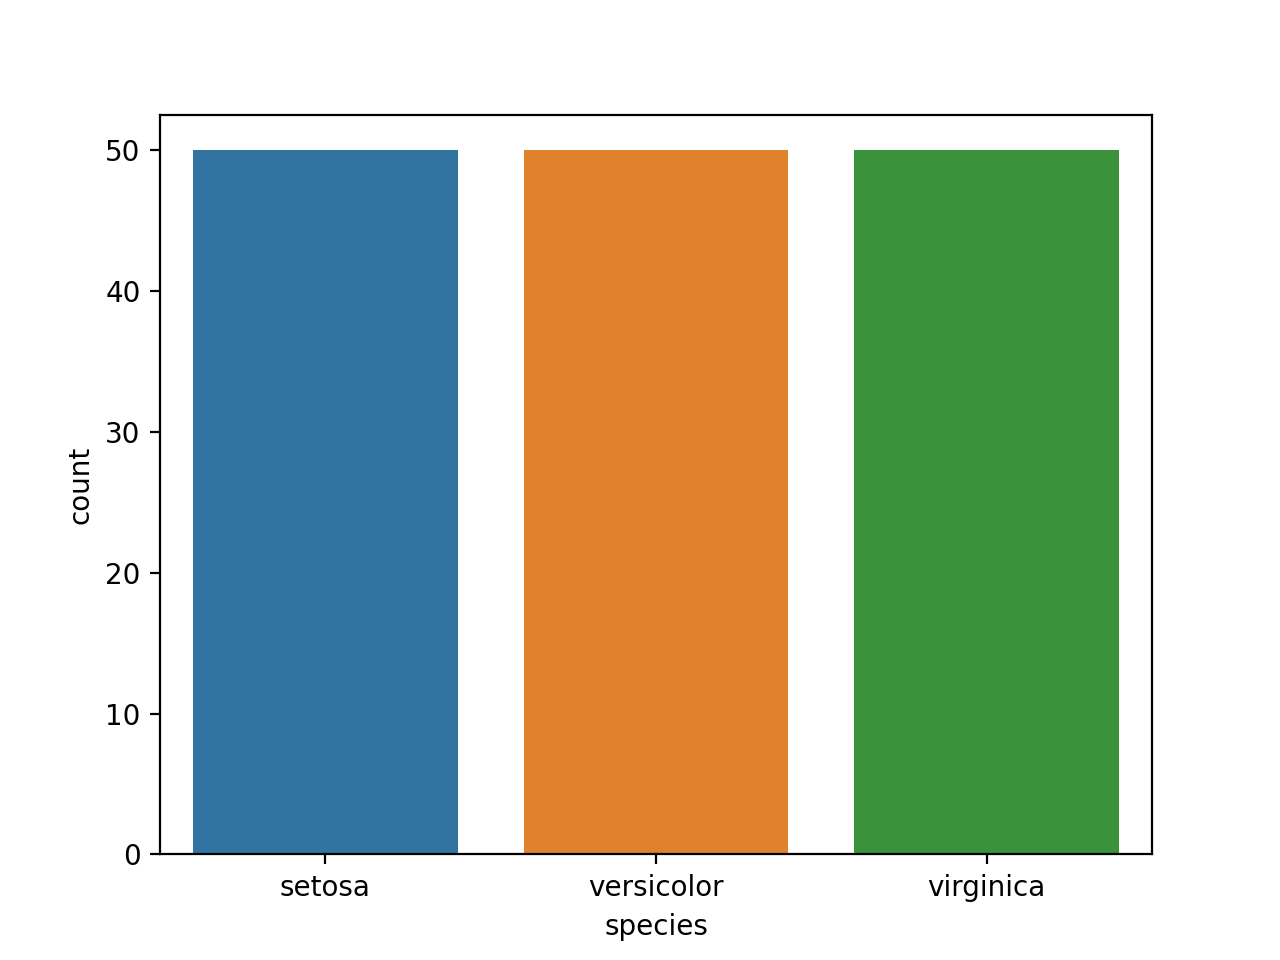

In [16]:
#diagrama de frecuencias
sns.countplot(x='species', data=iris)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

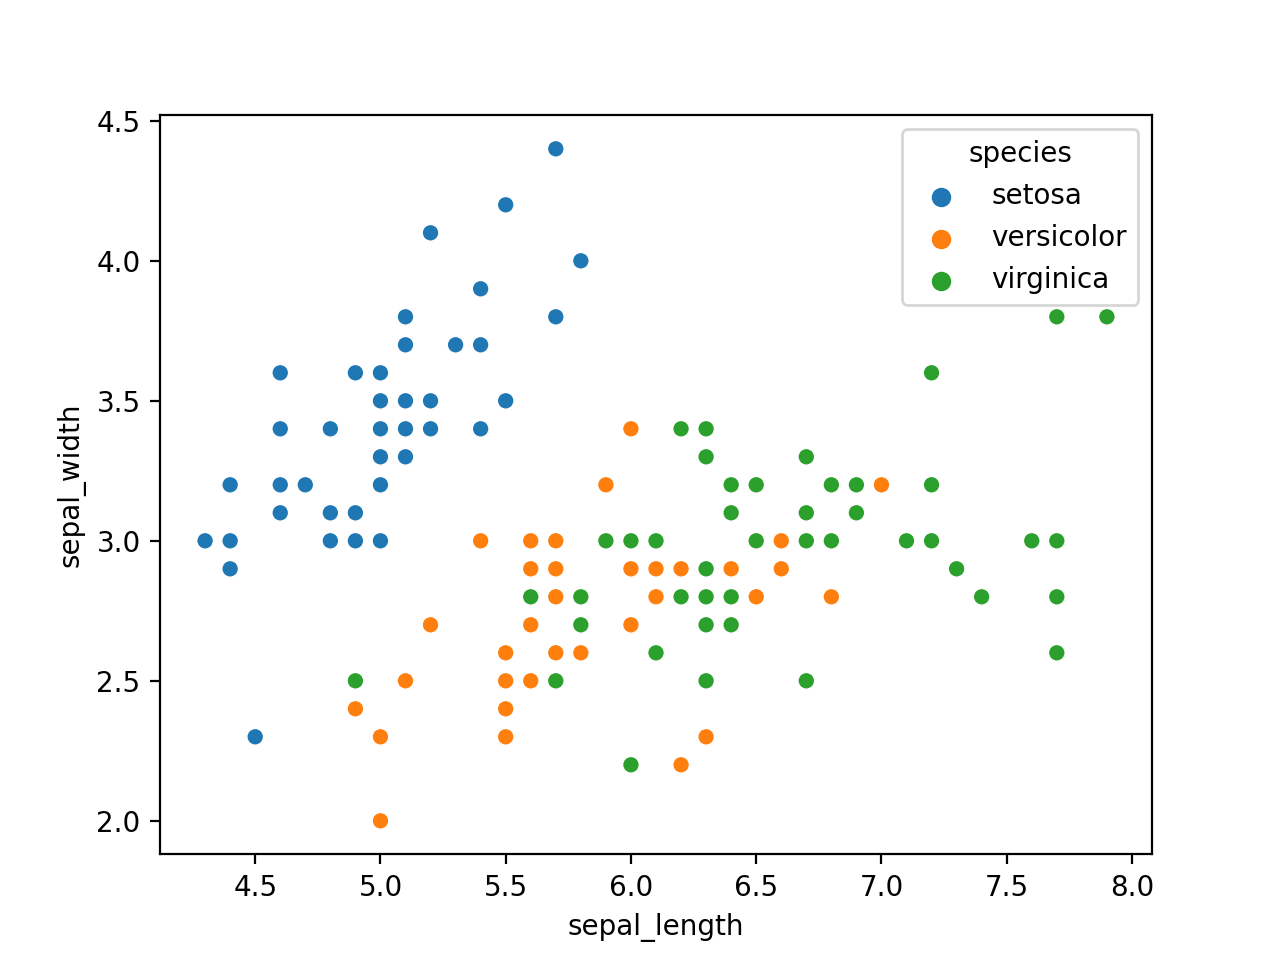

In [17]:
# diagrama de dispersión
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", hue="species")
